In [2]:
import pandas as pd

# Load dataset (adjust path if needed)
df_credit = pd.read_csv('../data/creditcard.csv')

# Quick check
print(df_credit.head())
print(df_credit.info())
print(df_credit['Class'].value_counts(normalize=True))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Drop 'Time' column (optional but common since it’s just elapsed seconds)
X_credit = df_credit.drop(columns=['Class', 'Time'])
y_credit = df_credit['Class']


In [4]:
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_credit, y_credit, test_size=0.2, random_state=42, stratify=y_credit
)

print(f"Train set shape: {X_train_c.shape}, Test set shape: {X_test_c.shape}")
print(f"Train target distribution:\n{y_train_c.value_counts(normalize=True)}")


Train set shape: (227845, 29), Test set shape: (56962, 29)
Train target distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
logreg_c = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf_c = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fit models
logreg_c.fit(X_train_c, y_train_c)
rf_c.fit(X_train_c, y_train_c)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



Model: Logistic Regression (Credit Card)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

F1 Score: 0.11070110701107011
Average Precision (AUC-PR): 0.7170196500794687


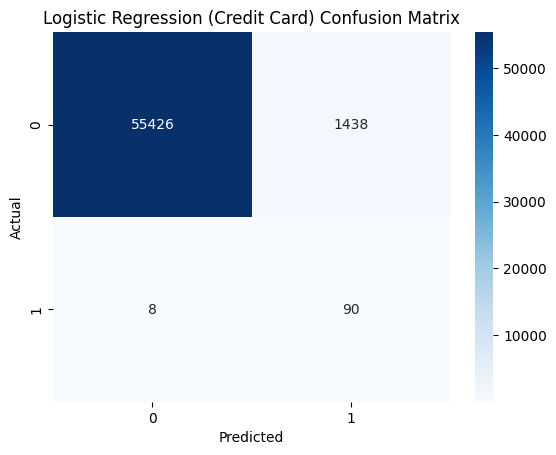

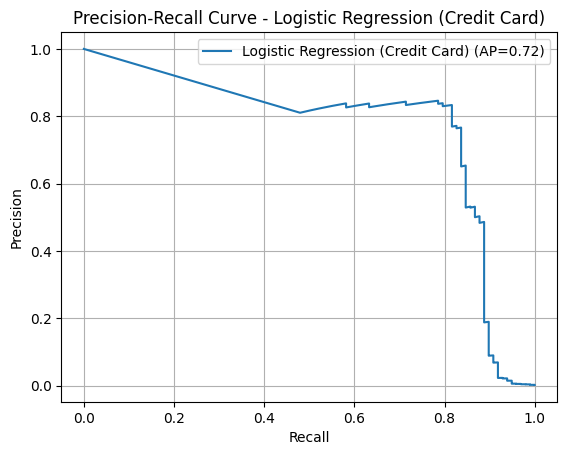


Model: Random Forest (Credit Card)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.8457142857142858
Average Precision (AUC-PR): 0.8484819006905729


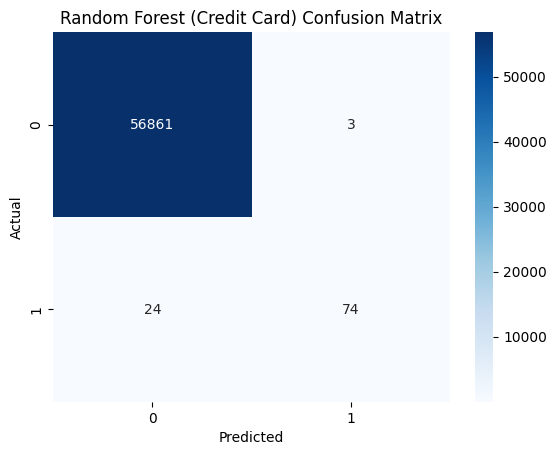

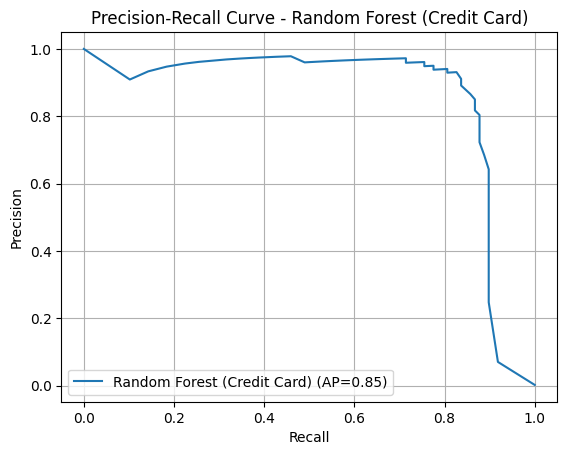

In [6]:
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score,
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {model_name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Average Precision (AUC-PR):", average_precision_score(y_test, y_probs))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    plt.plot(recall, precision, label=f'{model_name} (AP={average_precision_score(y_test, y_probs):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

# Evaluate Logistic Regression
evaluate_model(logreg_c, X_test_c, y_test_c, "Logistic Regression (Credit Card)")

# Evaluate Random Forest
evaluate_model(rf_c, X_test_c, y_test_c, "Random Forest (Credit Card)")
